In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os
sns.set()
%matplotlib inline

PROJ_ROOT = os.path.join(os.pardir)

### 1. Load and Peak Datasets

In [2]:
aisles = pd.read_csv('../data/raw/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
aisles.aisle_id.nunique()

134

In [5]:
aisles.aisle.nunique()

134

There are 134 aisles. 

In [6]:
departments = pd.read_csv('../data/raw/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


There are 21 different departments.

In [8]:
products = pd.read_csv('../data/raw/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


There are 49,688 products. 

In [10]:
# Join the above three dataframes for later use
products_aisle = products.merge(aisles)
products_info = products_aisle.merge(departments)
products_info.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


In [11]:
# Create a new dataframe presenting which deparment each aisle belongs to
aisle_dep = products_info.groupby('aisle').department.first()
aisle_dep_info = aisle_dep.rename_axis('aisle').reset_index(name='department')
aisle_dep_info.head()

,aisle,department
0,air fresheners candles,household
1,asian foods,international
2,baby accessories,babies
3,baby bath body care,babies
4,baby food formula,babies


In [12]:
# Save the dataframe above to a csv file
aisle_dep_info.to_csv(os.path.join(PROJ_ROOT, 'data', 'processed', 'aisle_department.csv'))

In [13]:
orders_all = pd.read_csv('../data/raw/orders.csv')
orders_all.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [14]:
orders_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [15]:
# check missing values for each column
orders_all.isnull().any()

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

There are NAs for column days_since_prior_order, since for the first order there is no days since prior order. I will fill NAs with 0. All the other columns have no missing values. 

In [16]:
orders_all.fillna(0, inplace=True)

In [17]:
# number of orders
orders_all.order_id.nunique()

3421083

In [18]:
# number of users
orders_all.user_id.nunique()

206209

- The dataset contains a sample of **3,421,083** grocery orders from **206,209** users. 
- For each user, the sequence of orders are provided. We are also given the information about the day of week, hour of day the order placed, and days between orders. 

In [19]:
order_products_prior = pd.read_csv('../data/raw/order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [20]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [21]:
order_products_prior.order_id.nunique()

3214874

This data file contains all the orders (**3,214,874** orders) prior to the users' most recent order. It also provides us with what products were bought in each order, the sequence of each product added to cart, and if this product is reordered or not. 

In [22]:
order_products_train = pd.read_csv('../data/raw/order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [23]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [24]:
order_products_train.order_id.nunique()

131209

order_products_prior contains all the prior orders for all the users. Then all the most recent orders for all the users are split into training and test data. order_products_train contains only training data for users' most recent orders (**131,209** orders). 

In [25]:
# How many order in the test set
len(orders_all[orders_all.eval_set == 'test'])

75000

In summary, out of **3,421,083** orders, **3,214,874** orders are prior orders, **131,209** are the most recent orders randomly assigned to training data, the rest **75,000** orders are the most recent orders randomly assigned to test data. 

### EDA

#### EDA for orders_all data frame

In [26]:
orders_all.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


##### When do users buy groceries on Instacart?

###### Day of Week

In [27]:
# Make a function to plot bar graph
def plot_bar(data, feature):
    '''plot bar graph for feature in dataframe'''
    plt.figure(figsize=(10, 6))
    data[feature].value_counts().sort_index().plot(kind='bar')
    plt.title('Bar Plot for {}'.format(feature))
    plt.xticks(rotation=360)

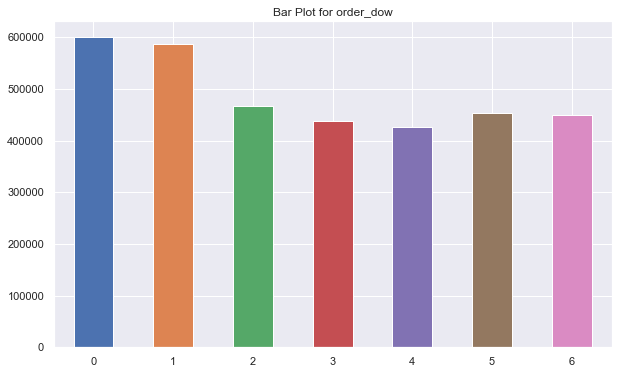

In [28]:
# On which day of week most people will place order on Instacart? 
plot_bar(orders_all, 'order_dow')

How the day of the week corresponds to the number is not provided. Based on the bar plot, my initial guess will be that 0 indicates Saturday, 1 indicates Sunday, 2 indicates Monday and so on. Since people are doing more grocery shopping during weekends, and less during weekdays. If it's the case, we can see that lowest order numbers happen on Wednesdays. 

###### Hour of Day

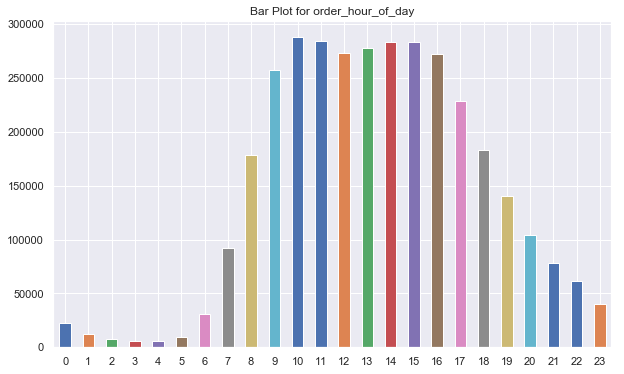

In [29]:
# On which hour of day most people will place order on Instacart? 
plot_bar(orders_all, 'order_hour_of_day')

Majority of the orders are placed during daytime. 

##### How often do users order again?

In [30]:
# Check the summary statistics for days_since_prior_order
orders_all.days_since_prior_order.describe()

count    3.421083e+06
mean     1.044488e+01
std      9.308727e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

Minimum is 0 which is filled to replace NA indicating this is the order of this user on Instacart. Max is 30 days. 50% of all the orders are either first orders or placed within 7 days since their prior order. 

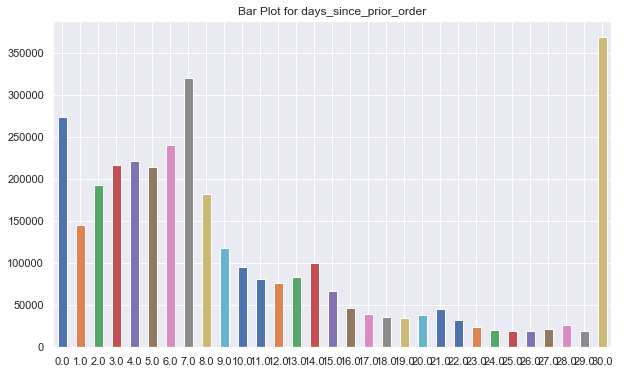

In [31]:
plot_bar(orders_all, 'days_since_prior_order')

- Majority of orders are placed within 8 days since their prior orders. People tends to do grocery shopping at least once per week. The distribution peaks at 7 days. 
- One thing needs to be noticed is that according to the plot a large number of orders are placed exactly 30 days after their prior order which may not make sense. One reason might be that it's censored, i.e. all values greater than 30 days are converted to 30 days. 

##### How many orders does each user place?

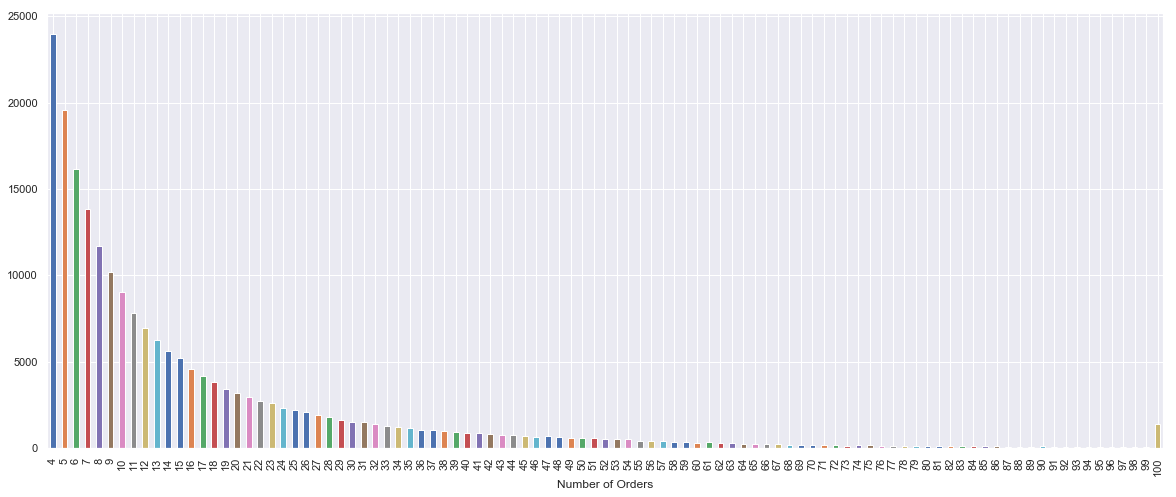

In [32]:
plt.figure(figsize=(20, 8))
orders_all.groupby('user_id').order_number.max().value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Orders');

In the provided dataset, there is no user ordered less than 4 times or more than 100 times. But the bar for 100 is not normal thus I suspect that this is also cencored.  

#### EDA for order_products_prior data frame

In [33]:
order_products_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


##### How many products in each order?

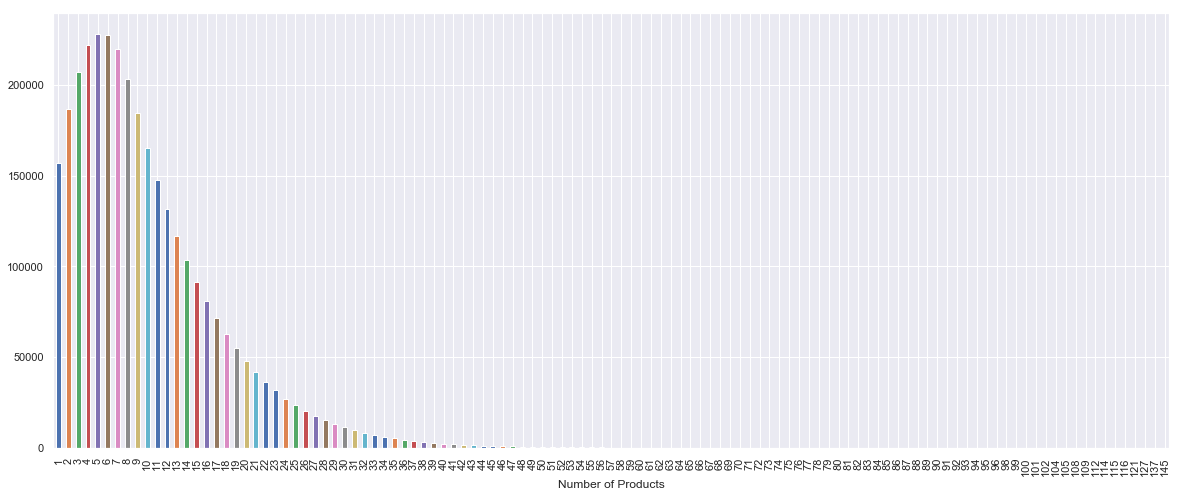

In [34]:
plt.figure(figsize=(20, 8))
order_products_prior.groupby('order_id').add_to_cart_order.max().value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Products');

Most frequently, users would buy 5 products in each order.  

##### What products are added to cart first in each order?

In [35]:
# merge order_products_prior with products_info 
order_products_prior_info = order_products_prior.merge(products_info)
order_products_prior_info.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


In [36]:
order_products_prior_info[order_products_prior_info.add_to_cart_order == 1].product_name.value_counts().head(25)

Banana                         110916
Bag of Organic Bananas          78988
Organic Whole Milk              30927
Organic Strawberries            27975
Organic Hass Avocado            24116
Organic Baby Spinach            23543
Organic Avocado                 22398
Spring Water                    16822
Strawberries                    16366
Organic Raspberries             14393
Sparkling Water Grapefruit      13733
Organic Half & Half             12676
Large Lemon                     12316
Soda                            11770
Organic Reduced Fat Milk         9885
Limes                            9719
Half & Half                      9528
Hass Avocados                    9500
Organic Reduced Fat 2% Milk      9338
Raspberries                      8885
Organic Fuji Apple               8762
Organic Blueberries              8740
Apple Honeycrisp Organic         8730
Organic Yellow Onion             8548
Unsweetened Almondmilk           8535
Name: product_name, dtype: int64

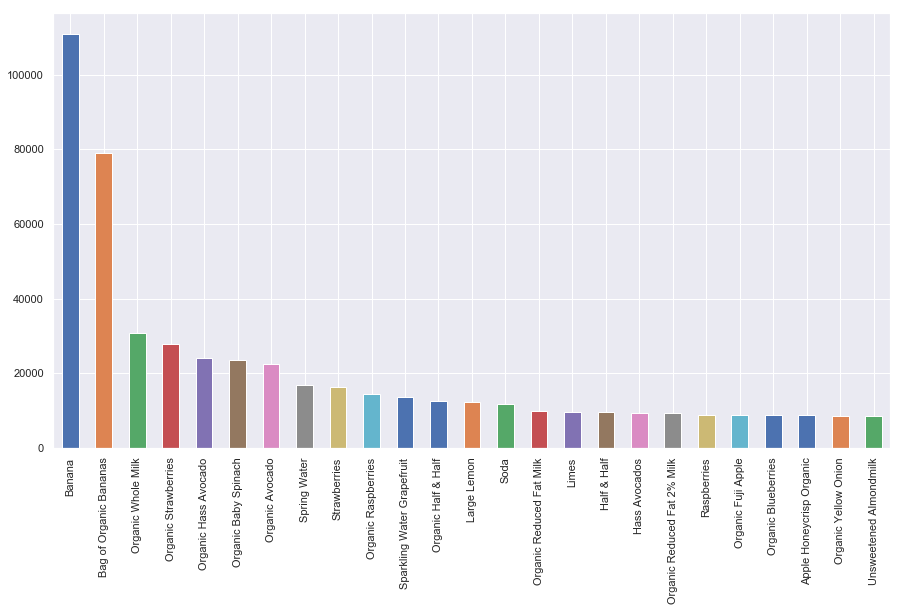

In [37]:
plt.figure(figsize=(15, 8))
order_products_prior_info[order_products_prior_info.add_to_cart_order
                          == 1].product_name.value_counts().head(25).plot(kind='bar');

Banana and bag of organic bananas are the items users often put into their cart first. Users are quite certain that they need bananas, thus the first thing to do is to add them to shopping cart. 

##### How many reorderd?

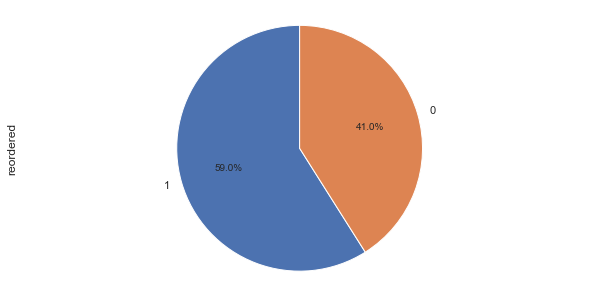

In [38]:
plt.figure(figsize=(10, 5))
order_products_prior.reordered.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal');

According to the pie plot, 59% of products are reordered while 41% are ordered first time. It makes sense for grocery shopping since people tend to buy some same stuff and some new stuff each time. 

##### What are the best sellers?

In [39]:
# Top 25 sellers
order_products_prior_info.product_name.value_counts().head(25)

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Seedless Red Grapes          82689
Organic Cucumber             80392
Honeycrisp Apple             79769
Organic Baby Carrots         76896
Organic Half & Half          76360
Name: product_name, dtype: int64

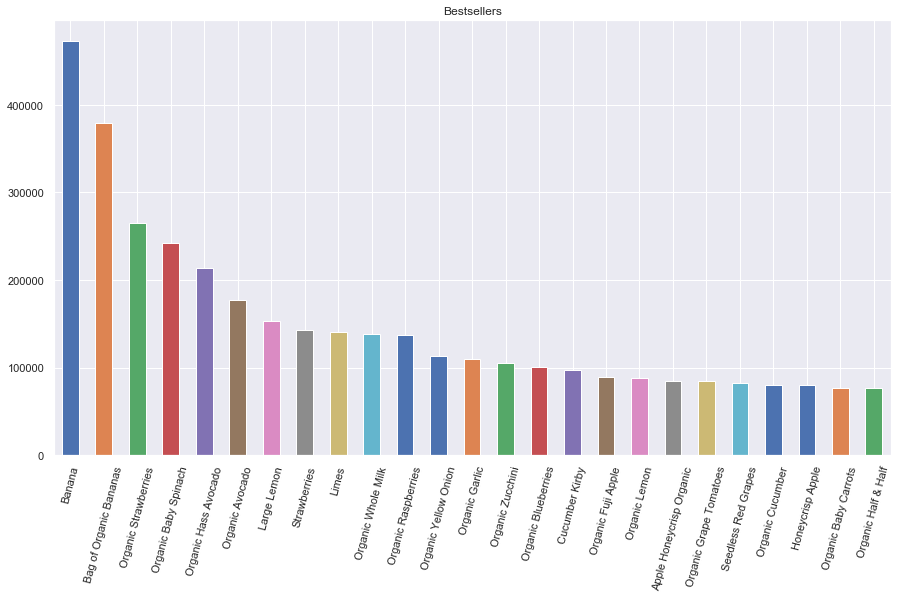

In [40]:
plt.figure(figsize=(15, 8))
order_products_prior_info.product_name.value_counts().head(25).plot(kind='bar')
plt.xticks(rotation=75)
plt.title('Bestsellers');

Users on Instacart are living a healthy life! Most of the top sellers are organic fruit and vegetables. 

In [41]:
# Top sellers by aisles
order_products_prior_info.aisle.value_counts().head(25)

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
cereal                            377586
soft drinks                       357537
fresh dips tapenades              355685
soup broth bouillon               346464
juice nectars   

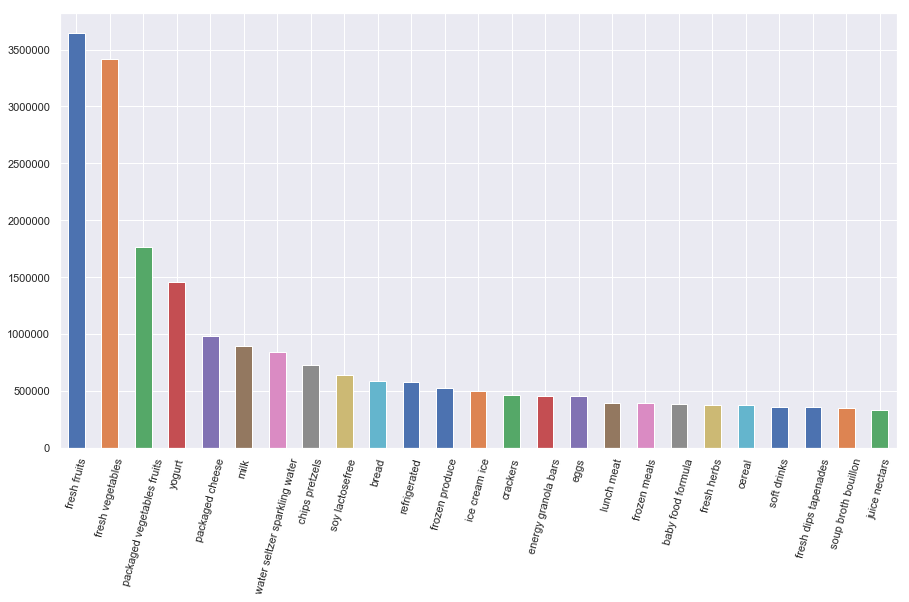

In [42]:
plt.figure(figsize=(15, 8))
order_products_prior_info.aisle.value_counts().head(25).plot(kind='bar')
plt.xticks(rotation=75);

As we expect, fresh fruits and fresh vegetables are the top two. 

In [43]:
# Top sellers by departments
order_products_prior_info.department.value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

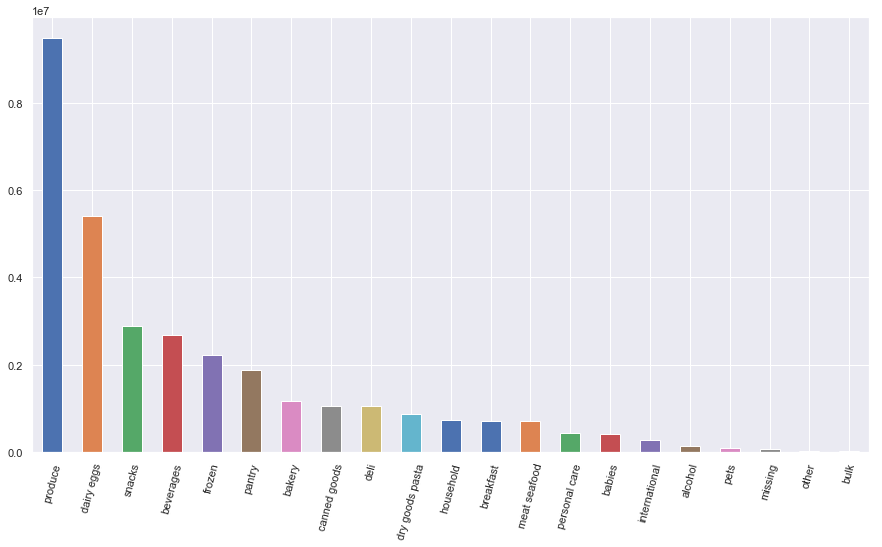

In [44]:
plt.figure(figsize=(15, 8))
order_products_prior_info.department.value_counts().plot(kind='bar')
plt.xticks(rotation=75);

Produce is the top department. Bulk is at the bottom since users don't need to buy bulk items frequently. 

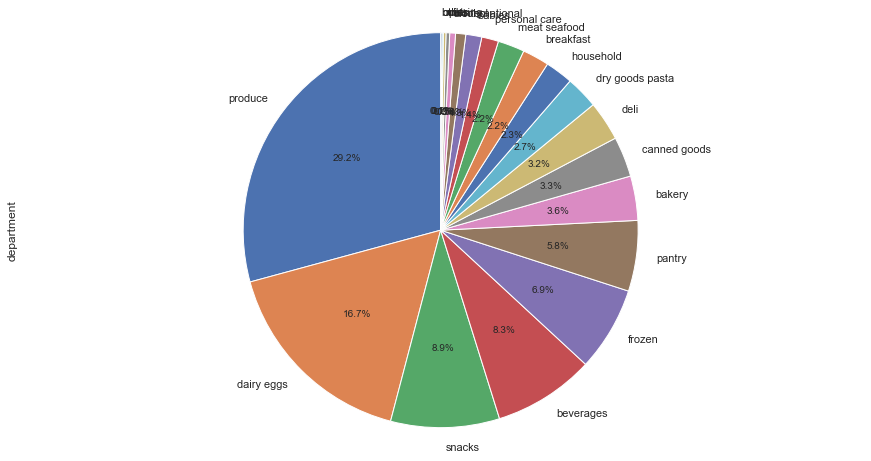

In [45]:
plt.figure(figsize=(15, 8))
order_products_prior_info.department.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal');

##### What are the best sellers for reordered products?

In [46]:
order_products_prior_info[order_products_prior_info.reordered == 1].product_name.value_counts().head(25)

Banana                                  398609
Bag of Organic Bananas                  315913
Organic Strawberries                    205845
Organic Baby Spinach                    186884
Organic Hass Avocado                    170131
Organic Avocado                         134044
Organic Whole Milk                      114510
Large Lemon                             106255
Organic Raspberries                     105409
Strawberries                             99802
Limes                                    95768
Organic Yellow Onion                     79072
Organic Garlic                           74663
Organic Zucchini                         72165
Cucumber Kirby                           67313
Organic Fuji Apple                       63811
Organic Blueberries                      62922
Apple Honeycrisp Organic                 62510
Organic Lemon                            60536
Organic Half & Half                      59672
Sparkling Water Grapefruit               58513
Honeycrisp Ap

It's pretty the same with the overall best sellers. 

In [47]:
# What are the best sellers by aisle for reordered products?
order_products_prior_info[order_products_prior_info.reordered == 1].aisle.value_counts().head(25)

fresh fruits                     2615469
fresh vegetables                 2032172
packaged vegetables fruits       1127177
yogurt                            997018
milk                              696264
water seltzer sparkling water     613977
packaged cheese                   573383
soy lactosefree                   442023
chips pretzels                    425387
bread                             391937
refrigerated                      381983
eggs                              318920
frozen produce                    283033
energy granola bars               272922
crackers                          261145
ice cream ice                     245400
lunch meat                        239653
soft drinks                       228406
baby food formula                 225748
cream                             217846
frozen meals                      217262
fresh dips tapenades              216232
cereal                            215822
juice nectars                     197733
fresh herbs     

In [48]:
# What are the best sellers by department for reordered products?
order_products_prior_info[order_products_prior_info.reordered == 1].department.value_counts()

produce            6160710
dairy eggs         3627221
beverages          1757892
snacks             1657973
frozen             1211890
bakery              739188
pantry              650301
deli                638864
canned goods        488535
meat seafood        402442
dry goods pasta     399581
breakfast           398013
household           297075
babies              245369
personal care       143584
international        99416
alcohol              87595
pets                 58760
missing              27371
bulk                 19950
other                14806
Name: department, dtype: int64

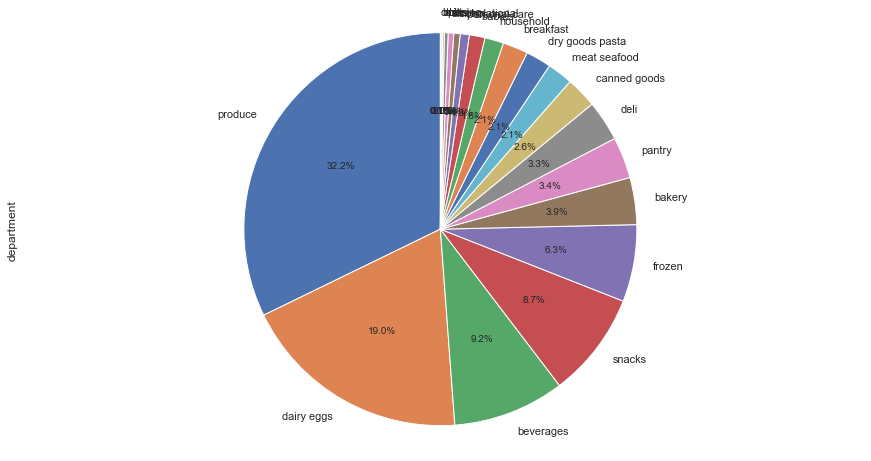

In [49]:
plt.figure(figsize=(15, 8))
order_products_prior_info[order_products_prior_info.reordered 
                          == 1].department.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal');

produce is still the best selling deparment. Dairy eggs comes the second, same as before. While beverages and snacks switched their position. 

##### Reorder Ratio by Department

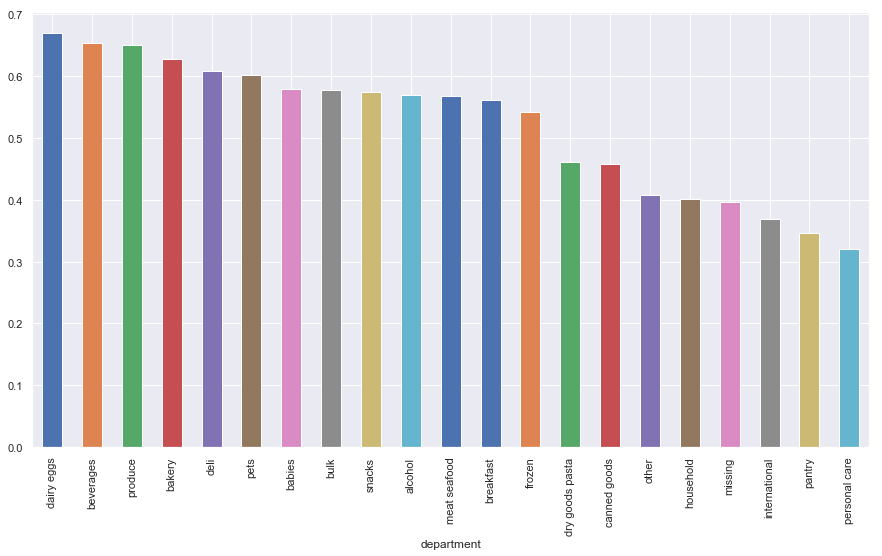

In [50]:
plt.figure(figsize=(15, 8))
order_products_prior_info.groupby('department').reordered.mean().sort_values(ascending=False).plot(kind='bar');

Dairy eggs is the department with highest reorder ratio. Users tend to reorder items from this deparment most frequently. By contrast, personal care gets the lower reorder ratio. 

##### Reorder Ratio VS Add_to_Cart_Order

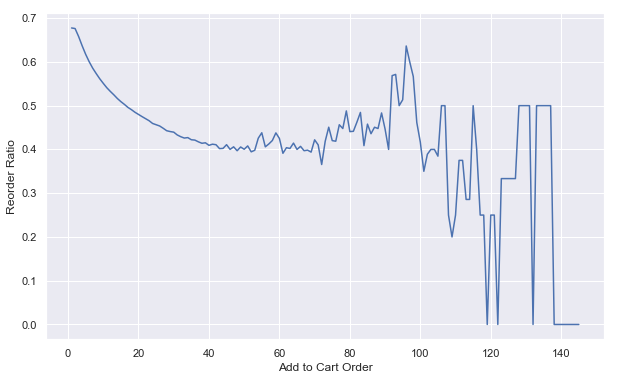

In [51]:
plt.figure(figsize=(10, 6))
order_products_prior_info.groupby('add_to_cart_order').reordered.mean().sort_index().plot()
plt.ylabel('Reorder Ratio')
plt.xlabel('Add to Cart Order');

- We can see a clear declining in reorder ratio while add to cart order increases from 0 to 40. Users usually like to add things already in their mind to cart first, among which many will be items they need to replenish in a regular period of time. After that users would like to explore new things to buy.
- After 40 sequences, the line is pretty werid since there are only a few orders bought more than 60 items, result is getting extreme with few data point. 

In [52]:
# Test correlation between reordered and add_to_cart_order
pearsonr(order_products_prior_info.add_to_cart_order, order_products_prior_info.reordered)

(-0.13302376570414876, 0.0)

Correlation coefficient between reordered and add_to_cart_order is -0.133 which is consistent with the declining line graph. There is a negative relationship between these two variables. 

##### Reorder Ratio VS Number of Orders

In [53]:
# Merge order_products_prior_info with orders_all to see how reordered is related to order_number
order_products_prior_full = order_products_prior_info.merge(orders_all, on='order_id')
order_products_prior_full.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [54]:
# Save order_products_prior_full dataframe to a csv file.
# order_products_prior_full.to_csv(os.path.join(PROJ_ROOT, 'data', 'processed', 'order_products.csv'))

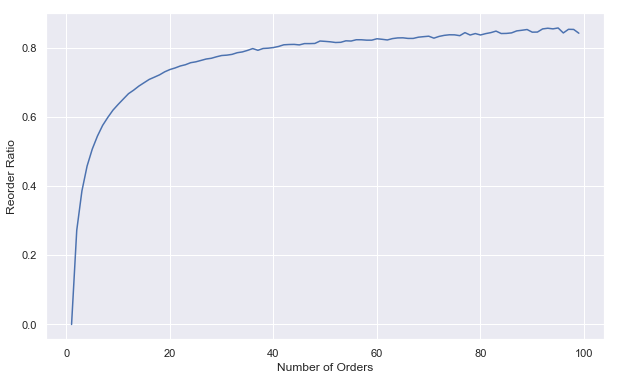

In [55]:
plt.figure(figsize=(10, 6))
order_products_prior_full.groupby('order_number').reordered.mean().plot()
plt.ylabel('Reorder Ratio')
plt.xlabel('Number of Orders');

In [56]:
pearsonr(order_products_prior_full.reordered, order_products_prior_full.order_number)

(0.30684022081892365, 0.0)

- The line will start from (1, 0) since all items in the first order are considered as newly ordered rather than reordered.
- Reorder ratio rises steeply for the first ten orders, then keeps rising diminishly. The positive relationship between these two features are reasonable as more orders placed, bigger probability of ordering same items as before.
- There is a ceiling for reorder ratio. No matter how many more products are purchased, users will still buy something new. 